<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> Seminar #1: ARIMA, ARIMAX

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Key words:** 
    - stationary TS, ARMA, ARIMA, ARIMAX, equvalence ARIMA and ES models

<h3> Plan </h3>
  * **Stationarity of TS** (20 minutes)
     - Examples of TS
     - Making TS Stationary by Box-Cox transformation
     - Making TS Stationary by Differencing 
     
     
  * ** ARIMA family models ** (40 minutes)
      - Forecasting staionary TS with ARMA
      - Forecasting with ARMAX,
      - Forecasting with SARIMAX
     
  * <span style="color:orange; font-size: 10pt">**Practice: ** (20 minutes)</span> (self-study)
     - <span style="color:orange; font-size: 10pt"> Realize Box-Cox transformation </span> 
     - <span style="color:orange; font-size: 10pt"> ES models are subset of ARIMA models </span>
     - <span style="color:orange; font-size: 10pt"> Online forecasting with ARIMA </span>

In [63]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import math
import pandas.tseries.offsets as ofs
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools

import warnings as w
import plotly.plotly as py
from IPython.display import Image

from utils import qualityMACAPE, qualityRMSE

%matplotlib inline

<h1 align="center"> Stationarity of TS </h1>
** Questions: **
   * What is stationaty TS?
   * How to make TS stationary?
      - Hint: see <a href="https://github.com/ml-mipt/ml-mipt-part2/blob/master/2017/lectures/tsa_arima.pdf">lecture 2</a>
      
# Examples of TS 

In [8]:
## Wage
ts_wage = pd.read_csv('../1_ts_esm/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')
ts_wage.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
ts_wage = ts_wage.sort_index() # sort index
ts_wage.head()

,Real wage
Timestamp,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


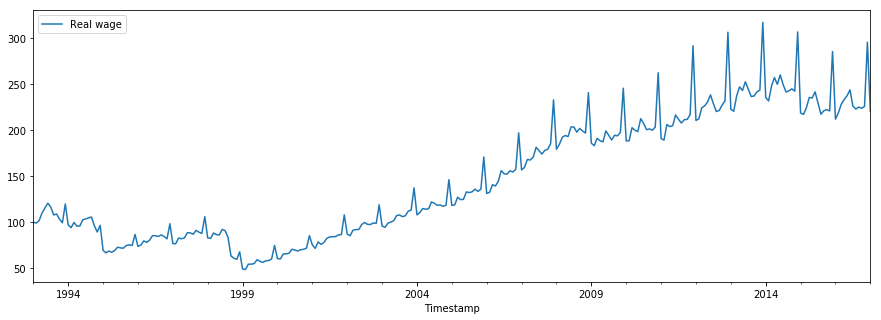

In [10]:
ts_wage.plot(figsize=(15,5))

** Questions:**
  - Which components of TS do you see?
  - Are there any dependences on other variables?
  - Is that TS stationary? Why?

## Time series of sales in Retail

In [12]:
# ts = pd.read_csv('data/TimeSeries_Data10.csv', sep=',', decimal='.',parse_dates={'Timestamp': pd.to_datetime(['Dates'],dayfirst=True, errors='coerce')}, index_col='Timestamp')
ts = pd.read_csv('../1_ts_esm/data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
ts = ts.sort_index() # sort index
ts.head()

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2005-01-11,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-12,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-13,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-14,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-15,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


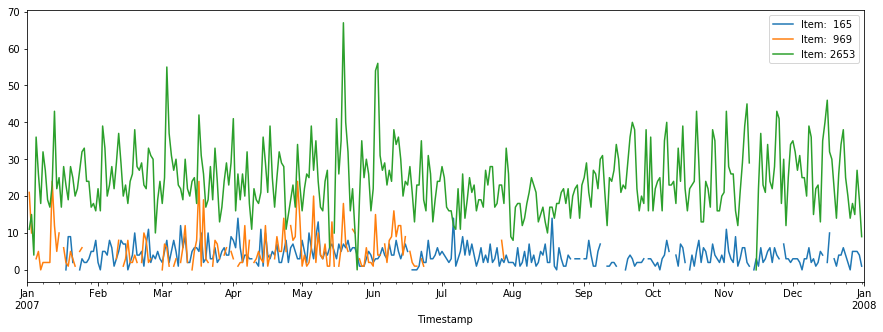

In [5]:
# fig = plt.figure()
ts.loc['2007-01-01':'2008-01-01', range(3)].plot(figsize=(15,5))
# to save the pictures
# plt.savefig('../Lecture_TS_Forecasting/pic/TS_Example.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

** Questions:**
  - Which components of TS do you see?
  - Are there any dependences on other variables?
  - Is that TS stationary? Why?

## Energy Consumption

In [14]:
# energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates={'Timestamp': pd.to_datetime('Date', errors='coerce')}, index_col='Timestamp')
energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
energy_ts.index.names=['Timestamp']
energy_ts.head()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Filter only Hub=Center and ZSP=FZSZOE27
energy_ts= energy_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]
energy_ts.tail()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2015-05-23,Center,FZSZOE27,NaN,11.7,11.9,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,Center,FZSZOE27,NaN,12.4,12.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,Center,FZSZOE27,NaN,16.2,15.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,Center,FZSZOE27,NaN,18.7,17.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-27,Center,FZSZOE27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


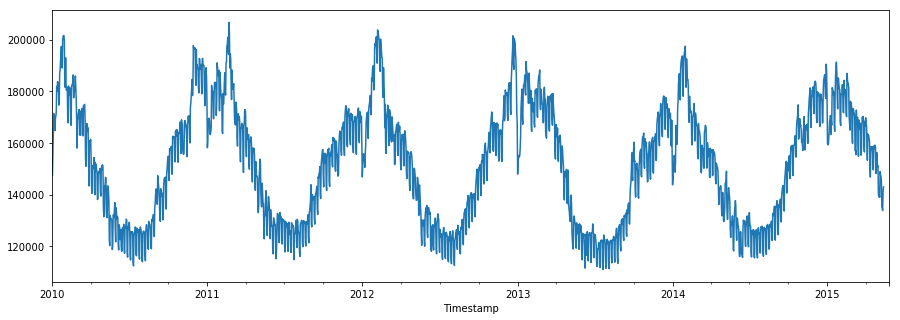

In [46]:
# See Year-Seasonality
energy_ts['EnergyConsump'].plot(figsize=(15,5))

# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_YearSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

**Questions** 
    - Which components of TS do you see?
    - Are there any dependences on other variables?
    - Is that TS stationary? Why?

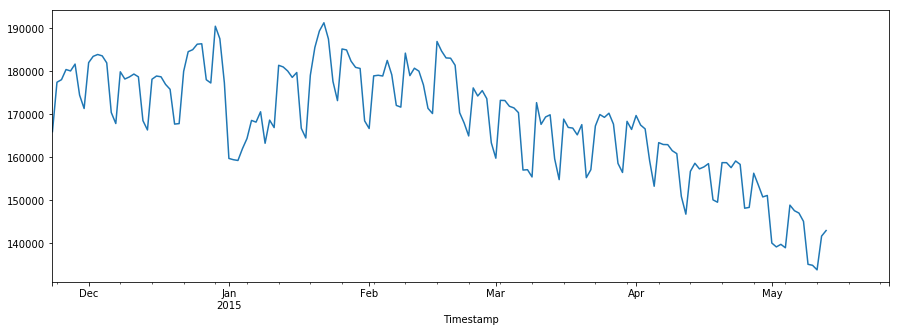

In [50]:
# See Week easonality
energy_ts['EnergyConsump'].tail(186).plot(figsize=(15,5))

In [41]:
# re_energy = week_reshaping(energy_ts[['EnergyConsump']])
week_df = pd.DataFrame(index = energy_ts.index, columns = {'EnergyConsump', 'dayofweek', 'weekno'})
week_df['EnergyConsump'] = energy_ts['EnergyConsump']
week_df['dayofweek'] = week_df.index.dayofweek
week_df['weekno'] = week_df.index.week
week_df.head(10)

,dayofweek,weekno,EnergyConsump
Timestamp,,,
2010-01-01,4,53,147487
2010-01-02,5,53,155434
2010-01-03,6,53,164140
2010-01-04,0,1,171383
2010-01-05,1,1,170188
2010-01-06,2,1,168969
2010-01-07,3,1,164773
2010-01-08,4,1,169339
2010-01-09,5,1,170479


** Prcatice:** plot dependence energy comsumption volume on dayofweek

In [77]:
#  put your code here


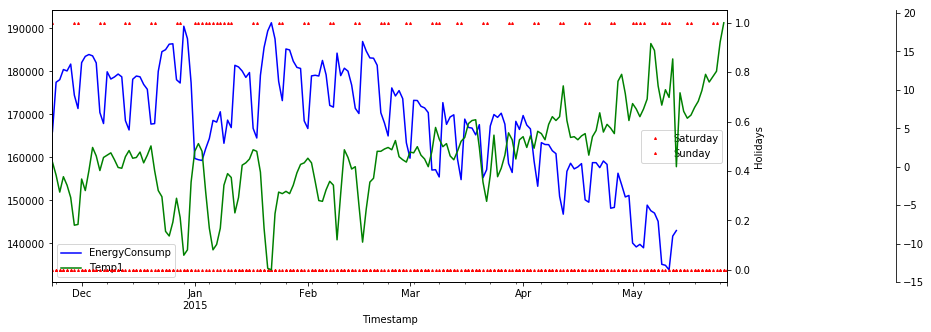

In [51]:
# See dependence on other varibales
fig, ax = plt.subplots(figsize=(15,5))
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

energy_ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
energy_ts[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
energy_ts['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() #  ax2.get_lines() 
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) # 
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

# Making TS Stationary by Box-Cox transformation

## $$ y'_t=\begin{cases}
		\ln y_t, & \lambda=0, \\
		\left(y_t^\lambda-1\right)/\lambda, & \lambda\neq 0.
		\end{cases}
		$$	


<img src='./pic/box-cox_fig1.jpg', width="300px">

After the forecast for the transformed time series is built it should be transformed into forecast of the initial time series:
## 		$$
		\hat{y}_t=\begin{cases}
		\exp\left(\hat{y}'_t\right), & \lambda=0, \\
		\left(\lambda\hat{y}'_t+1\right)^{1/\lambda}, & \lambda\neq 0.
		\end{cases}
		$$			

It helps to make TS plain in terms of variance of its values:
<img src='./pic/logtrans.png'>

## Wage TS

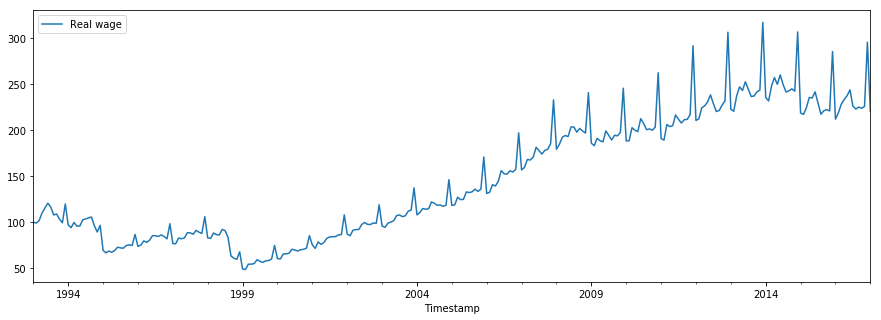

In [53]:
# plot time series
ts_wage.plot(figsize=(15,5))

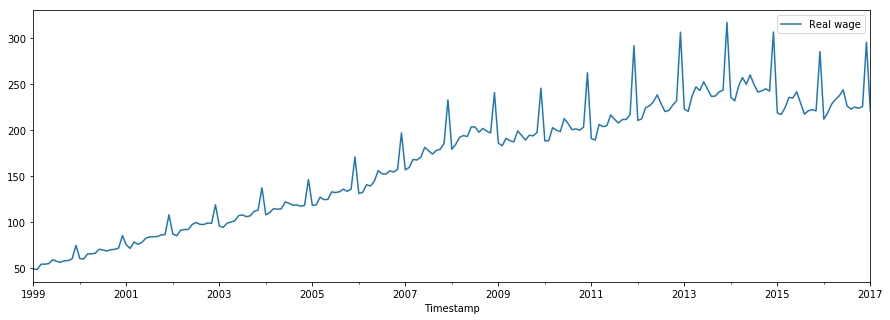

In [68]:
# cut first steps
ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(15,5))

 * Make it Stationary in term of variance of its values

In [60]:
from copy import deepcopy
ts_wage_boxcox = deepcopy(ts_wage)
# find optimal lambda 
print('optimal lambda:', stats.boxcox(ts_wage)[1][0])

optimal lambda: 0.922708974798


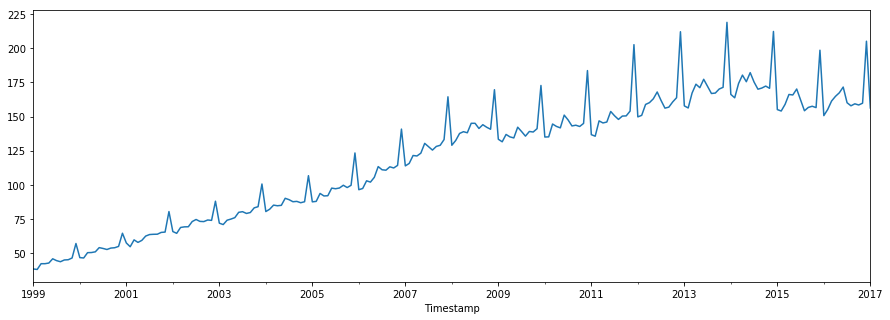

In [69]:
ts_wage_boxcox['wage_boxcox'] = stats.boxcox(ts_wage)[0]
ts_wage_boxcox['wage_boxcox'].plot(figsize=(15,5))

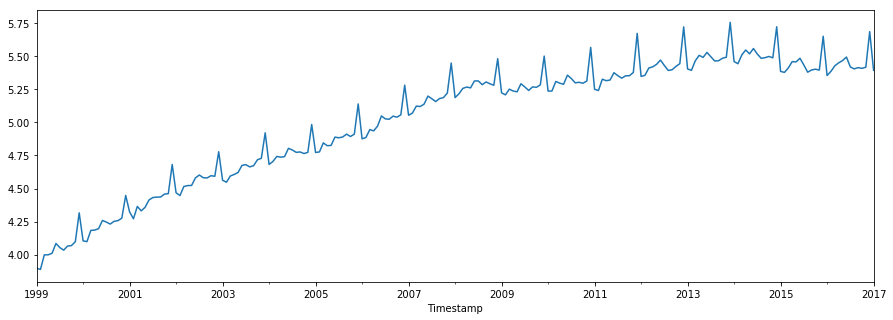

In [70]:
ts_wage_boxcox['wage_boxcox'] = np.log(ts_wage)
ts_wage_boxcox['wage_boxcox'].plot(figsize=(15,5))
# a= stats.boxcox(np.array(ts_wage['Real wage']), lmbda=0.1, alpha=0.05)[0]

** Questions: **
   * Which $\lambda$ is better for this TS (0 or 0.92)?
   * Is transformed TS stationary?

# Making TS Stationary by Differencing
## $$y_1,\dots,y_T \;\longrightarrow\;y'_2,\dots,y'_{T}, $$
## $$y'_t = y_t - y_{t-1}.$$
		
Seasonal differencing:
		
## $$y_1,\dots,y_T \;\longrightarrow \;y'_{s+1},\dots,y'_{T}, $$
## 		$$y'_t = y_t - y_{t-s}.$$	    
    

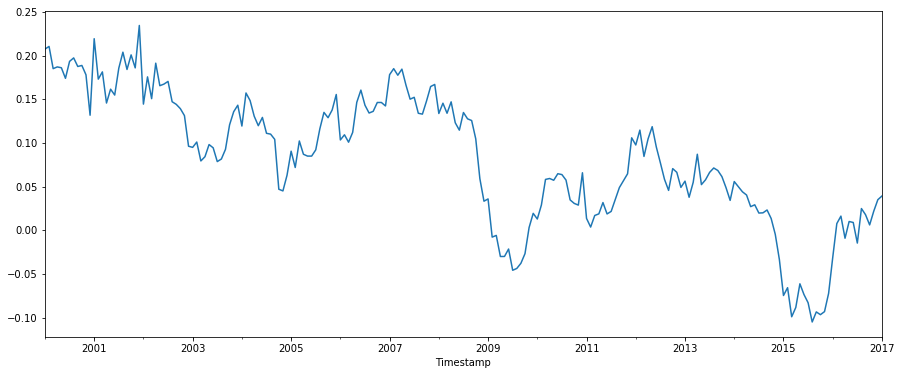

In [71]:
# seasonal differencing
p = 12
sdiff_ts_wage_boxcox = (ts_wage_boxcox['wage_boxcox'] - ts_wage_boxcox['wage_boxcox'].shift(p))[p:]
sdiff_ts_wage_boxcox.plot(figsize=(15,6))

** Questions:**
   * Is that TS stationary?

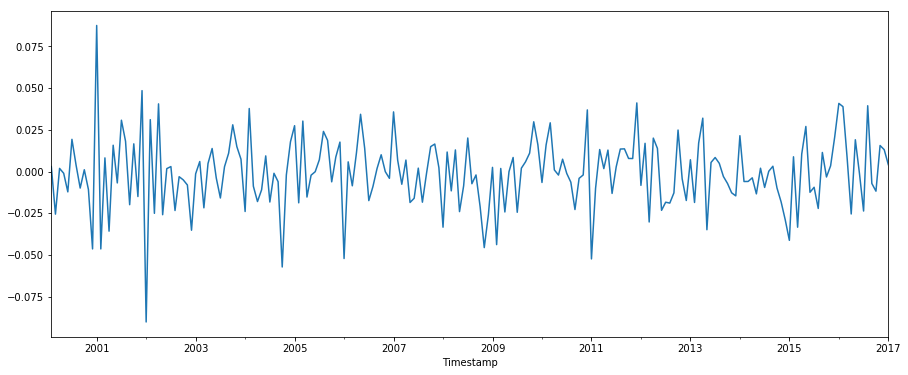

In [72]:
diff_sdiff_ts_wage_boxcox = (sdiff_ts_wage_boxcox  - sdiff_ts_wage_boxcox .shift(1))[1:]
diff_sdiff_ts_wage_boxcox.plot(figsize=(15,6))

** Questions:**
   * Is that TS stationary?
   * How to check it? (Which statistical tests do you know?)

In [73]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(np.array(diff_sdiff_ts_wage_boxcox))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.062453, 
pvalue: 0.10 
maximal Lag: 15 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning:

p-value is greater than the indicated p-value



In [78]:
# Augmented Dickey-Fuller unit root test
df_stat = stattools.adfuller(np.array(diff_sdiff_ts_wage_boxcox))
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -5.227607, 
pvalue: 0.00 
maximal Lag: 11 
critical values: {'1%': -3.4648754262570978, '5%': -2.876714157488788, '10%': -2.5748586990017359}


<h1 align="center"> ARIMA family models </h1>

## Forecasting staionary TS with ARMA
$$y_t = \underbrace{c+\sum_{i=1}^{p} \alpha_iy_{t-i}}\limits_{AR}+\underbrace{\sum_{j=1}^{q} \beta_j\varepsilon_{t-j}}\limits_{MA}+\varepsilon_t$$

or in canonical form (using back-operator $B$):

$$\phi\left(B\right)(y_t-\mu) = \theta\left(B\right)\varepsilon_t.$$

$\varepsilon_t$- random variable from $N(0, \sigma^2)$, $E\varepsilon_t=0, ~E\varepsilon_i\varepsilon_j=0$

** Question: **
    * What is $\phi\left(B\right)$ and $\theta\left(B\right)$
    
    

** Questions: **
  * Write down equation in canonical form for next TS:
       - 1) $y_t ={y_t-1} + 1 +\varepsilon_t$
       - 2) $y_t =y_{t - p} +\varepsilon_t$, where $p>1$ - period of seasonality
  
    <Answer>
   
* Show that $\phi(B)$ in equations above has unit roots.
   
   <Answer>
   
* Explain why linear operator $1-B$ is not invertable 
       Hint:
       - 1) show that back operator $B$ is a linear operator with norm 1;
       - 2) use the fact that if $||A||=1\Rightarrow (1-A)$ is not invertable
* Why ARMA model works only with stationary TS? 

# ARMA for forecasing Retail Time Series

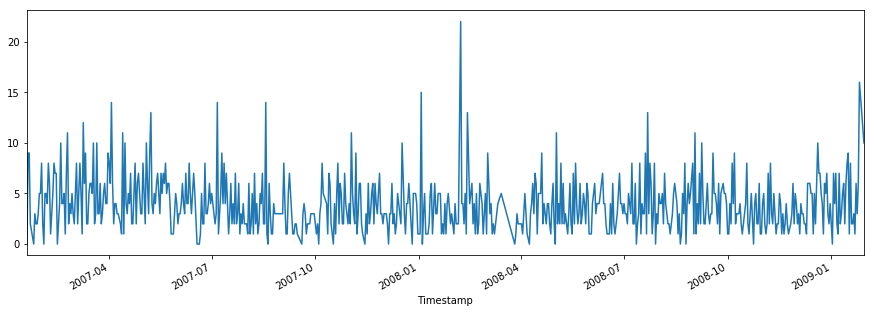

In [82]:
# удаляем пропуски: иначе нельзя
dta = ts[ts.columns[0]].dropna()
dta.plot(figsize=(15,5))

In [83]:
# Stationary test
kpss_stat= stattools.kpss(np.array(dta))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.509193, 
pvalue: 0.04 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


## Autocorrelation analysis

** Questions **
    * What is autocorrelation function?
    * What does coefficient of correlation show?
    
    
## $$ r_\tau = r_{y_t y_{t+\tau}} = \frac{\sum\limits_{t=1}^{T-\tau} \left(y_t - \bar{y}\right)\left(y_{t+\tau} - \bar{y}\right) }{ \sum\limits_{t=1}^T \left(y_t - \bar{y}\right)^2 },\;\; \bar{y} = \frac1{T} \sum_{t=1}^T y_t.$$
		
$r_\tau \in\left[-1,1\right], \;\; \tau$~--- autocorrelation lag.
    
* Autocorrelation analysis

https://onlinecourses.science.psu.edu/stat510/node/62

http://www.autobox.com/cms/index.php/blog/entry/build-or-make-your-own-arima-forecasting-model

http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.acf.html

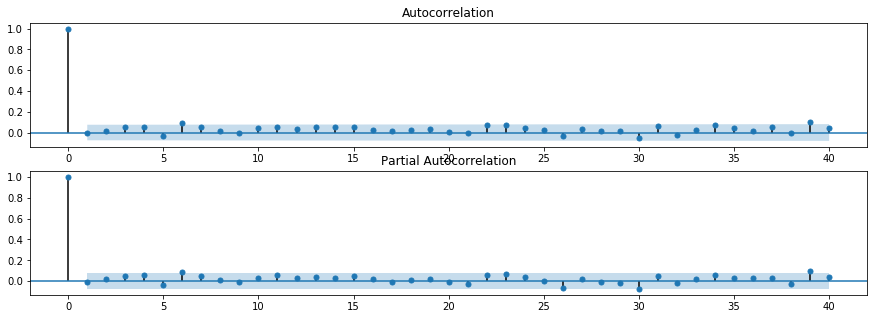

In [81]:
# Use Item 165
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)

* try just simple ARMA models

In [41]:
arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit()
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

const               3.910796
ar.L1.Item:  165   -0.007255
dtype: float64
(3301.602584786089, 3315.1864585389567, 3306.8591498132796)


In [42]:
arma_mod01 = sm.tsa.ARMA(dta, (0,1)).fit()
print(arma_mod01.params)
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)

const               3.910795
ma.L1.Item:  165   -0.006996
dtype: float64
(3301.603847883614, 3315.1877216364815, 3306.8604129108044)


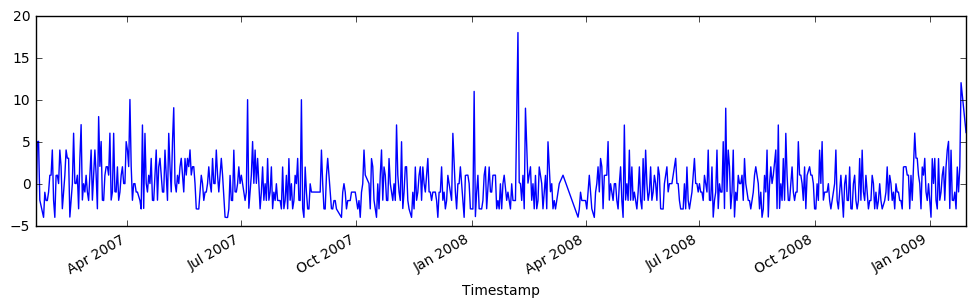

In [172]:
# plot residuals
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax = arma_mod01.resid.plot(ax=ax);

### Unbiasedness test

In [98]:
# Darbin_Watson statistic
sm.stats.durbin_watson(arma_mod01.resid.values)

1.9894592955896726

In [46]:
stat = stats.wilcoxon(arma_mod01.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 112078.000000
pvalue: 0.33


In [48]:
# Normal test
resid = arma_mod01.resid
stats.normaltest(resid)

NormaltestResult(statistic=212.08351416703624, pvalue=8.8440267461256245e-47)

* Hypothesis of normality can be rejected

### Analyse ACF, PACF for residals

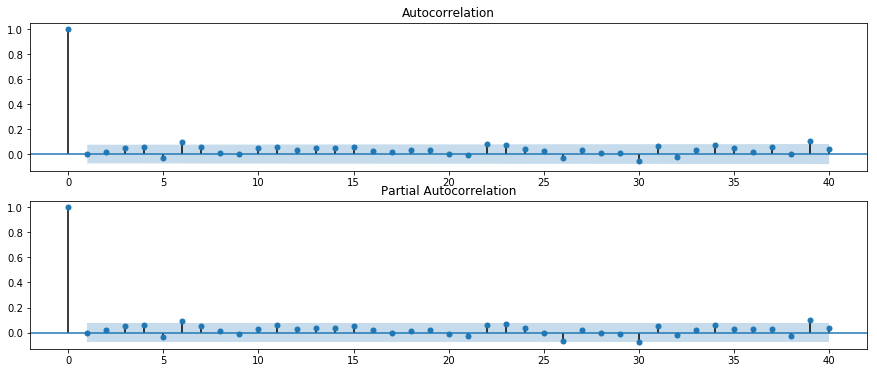

In [49]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [102]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.000119   0.000010  0.997512
2.0   0.018180   0.227398  0.892527
3.0   0.051004   2.019795  0.568308
4.0   0.057548   4.305060  0.366292
5.0  -0.031707   4.999802  0.415904
6.0   0.095845  11.357386  0.077939
7.0   0.056103  13.538901  0.060017
8.0   0.011613  13.632504  0.091861
9.0  -0.002443  13.636652  0.135850
10.0  0.044627  15.023150  0.131220
11.0  0.057814  17.353556  0.097844
12.0  0.035986  18.257807  0.108084
13.0  0.051329  20.100197  0.092740
14.0  0.049316  21.803492  0.082743
15.0  0.056200  24.018733  0.064776
16.0  0.025206  24.465007  0.079829
17.0  0.014184  24.606530  0.103870
18.0  0.028825  25.191932  0.119720
19.0  0.032562  25.940081  0.131867
20.0  0.003018  25.946519  0.167585
21.0 -0.005967  25.971719  0.207529
22.0  0.077311  30.208225  0.113491
23.0  0.076280  34.338749  0.060416
24.0  0.043199  35.665492  0.059124
25.0  0.021447  35.992992  0.071706
26.0 -0.035554  36.894418  0

### Forecast of Validation Period

In [135]:
frc_arma = arma_mod01.predict('2008-12-30', '2008-12-31', dynamic=False)
print(frc_arma)

Timestamp
2008-12-30    3.917016
2008-12-31    3.924208
dtype: float64


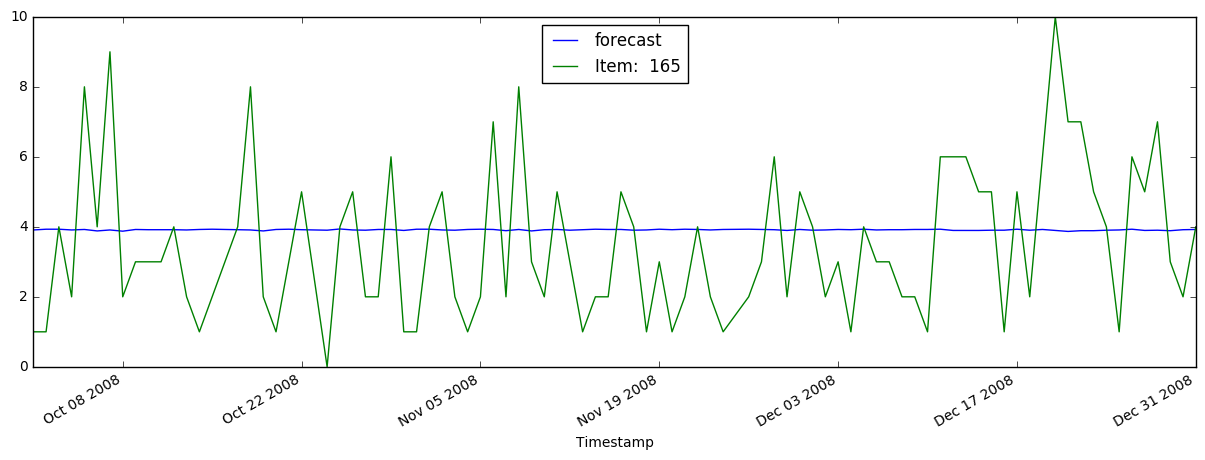

In [173]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arma_mod01.plot_predict(start='2008-10-01', end='2008-12-31', ax=ax)

### Forecast of Future Period

In [130]:
frc_arma = arma_mod01.forecast(steps=185)
print(frc_arma[1])

[ 2.69158051  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2

## ARIMAX

In [51]:
energy_ts.columns

Index([u'Hub', u'ZSP', u'EnergyConsump', u'Temp1', u'Temp2', u'Temp3',
       u'Temp4', u'Temp5', u'Temp6', u'Temp7', u'Saturday', u'Sunday',
       u'Temp1_South_Less', u'Temp2_South_Less', u'Temp3_South_Less',
       u'Temp4_South_Less', u'Temp1_South_Gr', u'Temp2_South_Gr',
       u'Temp3_South_Gr', u'Temp4_South_Gr'],
      dtype='object')

In [52]:
dta = energy_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna()
exogs = dta[['Temp1', 'Temp2', 'Saturday','Sunday']][dta.index<'2015-05-01']
extra_exogs = dta[['Temp1', 'Temp2', 'Saturday','Sunday']]
dta = dta[['EnergyConsump']][dta.index<'2015-05-01']
extra_exogs.tail(13)

,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,
2015-05-01,8.2,5.1,0.0,1.0
2015-05-02,7.5,4.9,1.0,0.0
2015-05-03,6.5,2.7,0.0,1.0
2015-05-04,7.5,3.1,0.0,1.0
2015-05-05,8.8,5.4,0.0,0.0
2015-05-06,16.0,10.6,0.0,0.0
2015-05-07,15.1,11.2,0.0,0.0
2015-05-08,10.5,9.6,0.0,0.0
2015-05-09,8.0,7.9,1.0,0.0


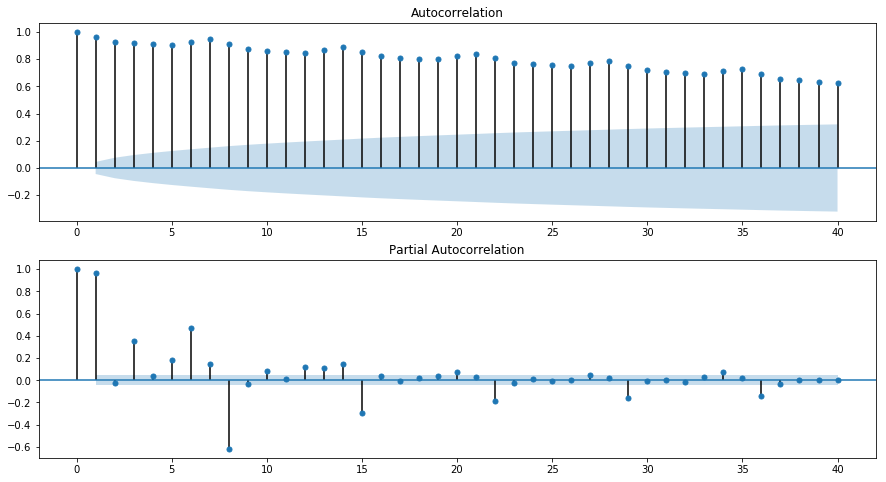

In [54]:
# Use energy data
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)

** Question **
 - Can we use thiss ACF, PACF for choosing p,q?

In [55]:
# Only regressors
arima_mod000 = sm.tsa.ARIMA(dta, (0,0,0), exog=exogs).fit()
print(arima_mod000.params)
print(arima_mod000.aic, arima_mod000.bic, arima_mod000.hqic)

const       165786.199872
Temp1        -1472.723514
Temp2         -488.466321
Saturday     -9958.554880
Sunday      -12299.971714
dtype: float64
(40467.462212534301, 40500.903400110779, 40479.758125812972)


In [56]:
# only ARMA components
arima_mod710 = sm.tsa.ARIMA(dta, (7,1,0)).fit()
print(arima_mod710.params)
print(arima_mod710.aic, arima_mod710.bic, arima_mod710.hqic)

const                   -0.199795
ar.L1.D.EnergyConsump   -0.080273
ar.L2.D.EnergyConsump   -0.181358
ar.L3.D.EnergyConsump   -0.127230
ar.L4.D.EnergyConsump   -0.083809
ar.L5.D.EnergyConsump   -0.190023
ar.L6.D.EnergyConsump   -0.042998
ar.L7.D.EnergyConsump    0.617713
dtype: float64
(37575.45161494667, 37625.608770251143, 37593.894263184309)


C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



* ARMA + individual variables

In [109]:
arima_mod710_ex = sm.tsa.ARIMA(dta, (7,1,0), exog=exogs).fit()
print(arima_mod710_ex.params)
print(arima_mod710_ex.aic, arima_mod710_ex.bic, arima_mod710_ex.hqic)

const                     2342.900406
Temp1                       57.586023
Temp2                     -105.159365
Saturday                -11256.039610
Sunday                   -4540.695095
ar.L1.D.EnergyConsump       -0.017472
ar.L2.D.EnergyConsump       -0.032838
ar.L3.D.EnergyConsump       -0.109722
ar.L4.D.EnergyConsump       -0.082320
ar.L5.D.EnergyConsump       -0.050773
ar.L6.D.EnergyConsump       -0.022363
ar.L7.D.EnergyConsump        0.586471
dtype: float64
(37268.213791787486, 37340.663016116167, 37294.853172575182)


C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [113]:
arima_mod910_ex = sm.tsa.ARIMA(dta, (9,1,0), exog=exogs).fit()
print(arima_mod910_ex.params)
print(arima_mod910_ex.aic, arima_mod910_ex.bic, arima_mod910_ex.hqic)

const                     2519.366385
Temp1                      136.869813
Temp2                     -160.896848
Saturday                -10476.775169
Sunday                   -8954.911408
ar.L1.D.EnergyConsump        0.192624
ar.L2.D.EnergyConsump        0.009757
ar.L3.D.EnergyConsump       -0.085329
ar.L4.D.EnergyConsump       -0.062105
ar.L5.D.EnergyConsump       -0.138750
ar.L6.D.EnergyConsump        0.035232
ar.L7.D.EnergyConsump        0.555617
ar.L8.D.EnergyConsump       -0.113736
ar.L9.D.EnergyConsump       -0.170689
dtype: float64
(37198.56233547239, 37282.157594313176, 37229.300082535112)


C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [110]:
print(arima_mod710_ex.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.EnergyConsump   No. Observations:                 1945
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -18621.107
Method:                       css-mle   S.D. of innovations           3477.347
Date:                Tue, 01 Nov 2016   AIC                          37268.214
Time:                        02:31:58   BIC                          37340.663
Sample:                    01-02-2010   HQIC                         37294.853
                         - 04-30-2015                                         
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                  2342.9004        nan        nan        nan           nan       nan
Temp1                    57.5860     28.842      1.997      0.046         1.058   114.114
Temp2   

C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning:

TimeSeries is deprecated. Please use Series



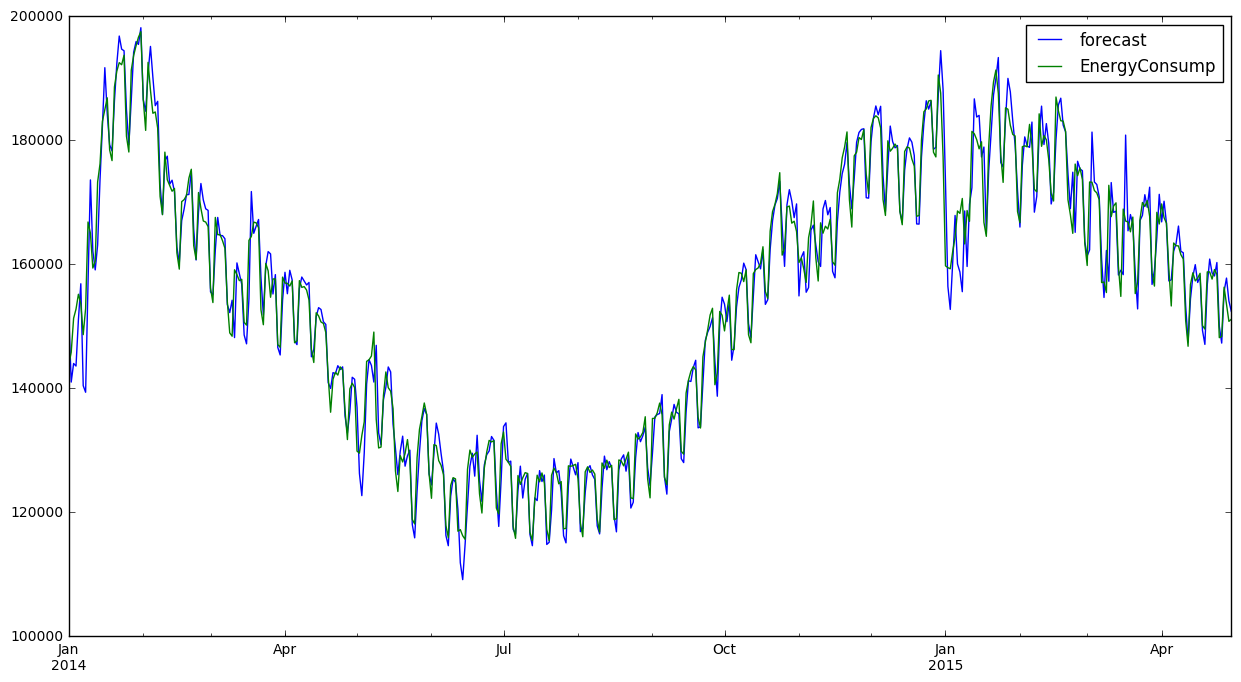

In [111]:
fig, ax = plt.subplots(figsize=(15,8),  linewidth=3.0)
fig = arima_mod710_ex.plot_predict(start='2014-01-01', end='2015-04-30', ax=ax)
# legend = ax.legend(loc='upper left')

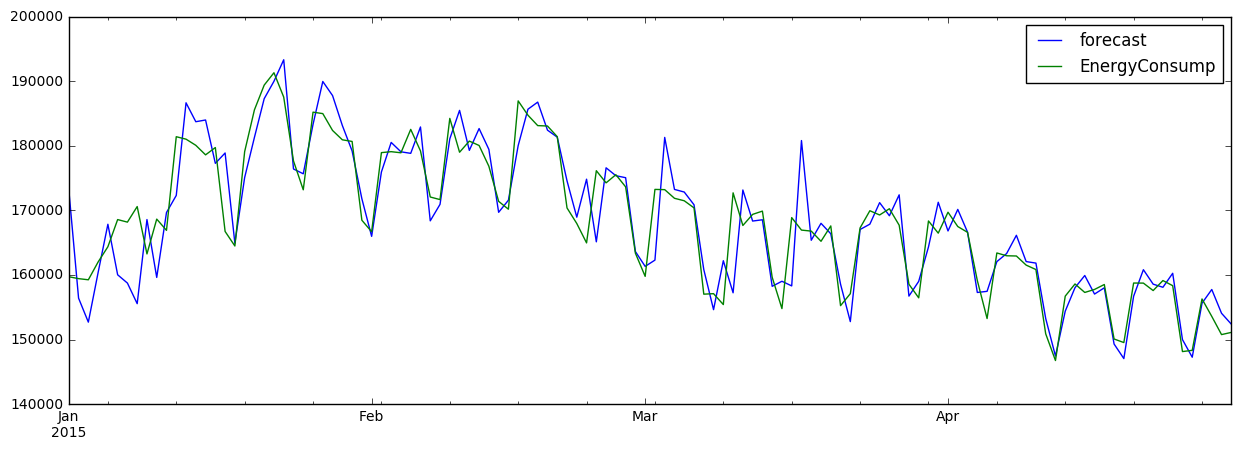

In [147]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arima_mod710_ex.plot_predict(start='2015-01-01', end='2015-04-30', ax=ax)
# legend = ax.legend(loc='upper left')

In [161]:
# fig, ax = plt.subplots(figsize=(15,8),  linewidth=3.0)
# fig = arima_mod710_ex.plot_forecast(185)
frc = arima_mod710_ex.forecast(steps = 13, exog = extra_exogs[extra_exogs.index>='2015-05-01'])

frc_arimax = extra_exogs[extra_exogs.index>='2015-05-01']
frc_arimax['FRC'] = frc[0]
frc[0]

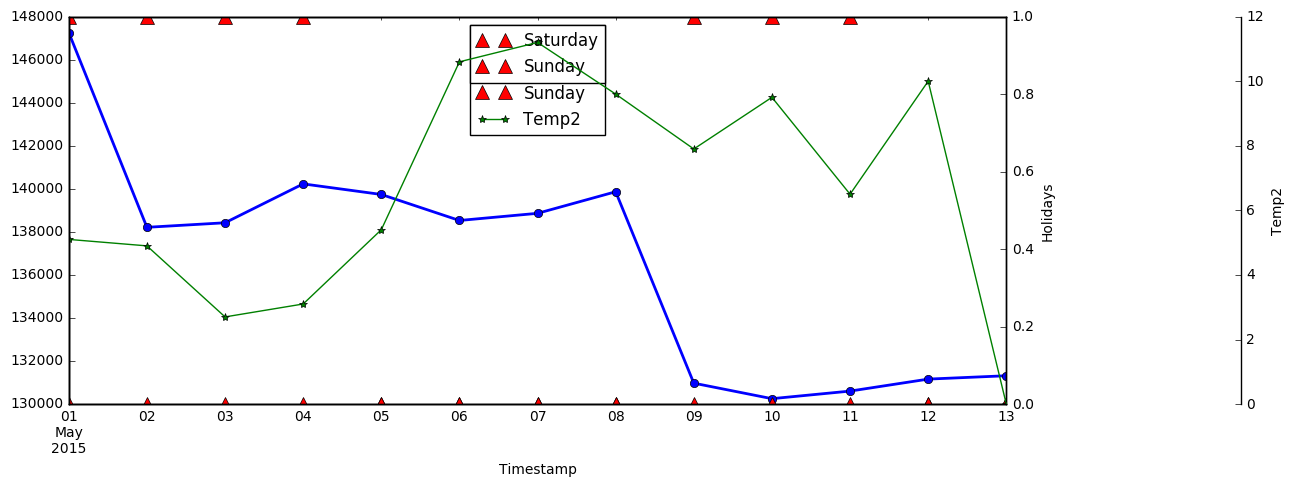

In [167]:
fig, ax = plt.subplots(figsize=(15,5))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.set_ylabel('Temp2')
fig.subplots_adjust(right=0.75)

frc_arimax['FRC'].tail(186).plot(ax = ax,  style='b-', marker = 'o', linewidth=2.0)
frc_arimax[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 10.0, linewidth=0.0)
frc_arimax['Temp2'].tail(186).plot(ax = ax3,  style='g-', marker='*')

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')

## SARIMA

Specification of SARIMA: ARIMA$(p,d,q)\times (P,D,Q)_s$:
$$ (1-L)^{d} (1-L^s)^{\color{red}{D}} y_t=z_t$$

$$z_t = \underbrace{\mu +\sum_{i=1}^{p} \alpha_i \left(\sum_{k=1}^{\color{red}{P}}\delta_pL^{\color{red}{s}\cdot k}\right) z_{t-i}}\limits_{AR} +\underbrace{\sum_{j=1}^{q} \beta_j\left(\sum_{l=1}^{\color{red}{Q}}\gamma_jL^{\color{red}{s}\cdot l}\right)\varepsilon_{t-j}}\limits_{MA}+\varepsilon_t$$

In [58]:
mod = sm.tsa.statespace.SARIMAX(dta, trend='n', order=(0,1,0), seasonal_order=(0,1,1,7))
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                
Dep. Variable:                     EnergyConsump   No. Observations:                 1946
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 7)   Log Likelihood              -18629.947
Date:                           Sat, 03 Jun 2017   AIC                          37263.894
Time:                                   06:42:41   BIC                          37275.041
Sample:                               01-01-2010   HQIC                         37267.993
                                    - 04-30-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.7337      0.007   -106.610      0.000      -0.747      -0.720
sigma2       1.29e+07   1.41e+05     91.423

See example
https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb

<h1 align="center"> Practice </h1>

# Practice: Realize Box-Cox transformation

As you've seen boxcox transformation from scipy does not work well.
It's suggested to realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="file:///C:/Users/rusrom/Downloads/Guerrero_JoF1993.pdf">here</a>.  

You need to replace all 'TODO' below by some code:

In [2]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x=  'TODO: shift time series up'
            
        if self.lmbda is None:
            self.lmbda = 'TODO: shift time series up'
            
        
            
        if self.lmbda == 0:
            self.y = 'TODO: '
        else:
            self.y = 'TODO: '
        return self.y, self.lmbda
        
    def optimal_lambda(self,x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)
               
        sigma = 'TODO: initialize array for log(sigma_i)'
        m = 'TODO: initialize array for matrix of regression [1, log(m_i)]'

        r = len(x)/n  # the length of each subseries

        for i in range(n):
            m[1][i] = 'TODO: fill matrix of regression'
            sigma[i] = 'TODO: fill array of sigma'

        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda, 
        w = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,y))[1]
        
        self.lmbda = 'TODO: set value of lambda'
        
        print self.lmbda
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = 'TODO' 
        else:
            x = 'TODO'
        return x        

## Check your solution on wage data

In [3]:
# boxcox for wage dataset 
import pandas as pd
%matplotlib inline
ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

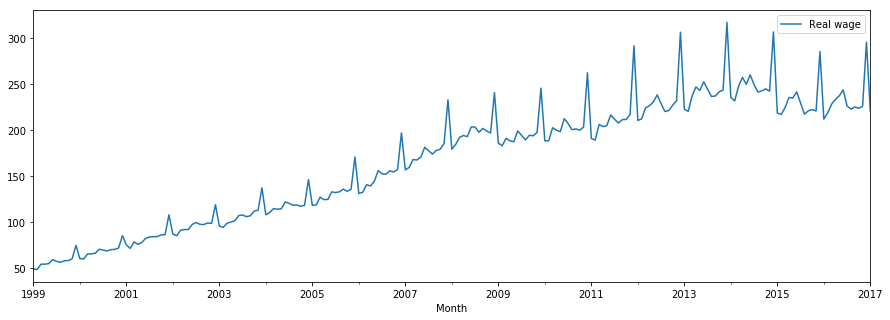

In [4]:
# cut first steps
ts_wage = ts_wage.ix['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(15,5))

In [ ]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print ('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))

# ES models are subset of ARIMA models

ARIMA contains all ES models with linear trend and additive seasonality

   * ARIMA(p=0,d=1,q=1) is equivalent to Simple ES with
###     $$(1-L)y_t = (1-\phi_1 L)\varepsilon_t$$
###    $$\phi_1 = 1-\alpha$$

Proof:
###    $$y_t-y_{t-1} = \varepsilon_t-\phi_1 \varepsilon_{t-1}=y_t-\hat{y}_t - (1-\alpha)\cdot (y_{t-1}-\hat{y}_{t-1}) $$
    
###    $$\hat{y}_t= y_{t-1} - y_{t-1}+\alpha y_{t-1} + (1-\alpha)\cdot\hat{y}_{t-1}={\hat{y}_{t-1}+\alpha\cdot e_{t-1}}$$

   * ARIMA(p=0,d=2, q=2) is equivalent to Holt (linear trend) with:
###    $$(1-L)^2Y_t = (1-\phi_1 L-\phi_2 L^2)\varepsilon_t$$
###    $$\phi_1 = 2-\alpha-\alpha\beta, \text{ }\phi_2 = \alpha-1$$
	

   * Damped-trend linear exponential smoothing is the ARIMA(1,1,2) model
### 		$$(1-\phi B)(1-B)Y_t = (1-\theta_1 B-\theta_2 B^2)\epsilon_t$$
### 		$$\theta_1 = 1+\phi-\alpha-\alpha\beta\phi, \text{ } \theta_2 = (\alpha-1)\phi$$
        $\phi$ - coefficient of damped trend;

   * Seasonal exponential smoothing is the ARIMA(0,1,p+1)$(0,1,0)_p$ model
### 		$$(1-B)(1-B^p)Y_t = (1-\theta_1 B-\theta_2 B^p-\theta_3B^{p+1})\epsilon_t$$
### 		$$\theta_1 = 1-\alpha$$
### 		$$\theta_2 = 1-\gamma(1-\alpha)$$
### 		$$\theta_3 = (1-\alpha)(\gamma-1)$$

   * ARIMA$(0,1,p+1)(0,1,0)_p$  is equivalent to additive seasonality ES model with:
### 		$$(1-B)(1-B^p)Y_t = [ 1-\sum_{i=1}^{p+1}\theta_iB^i ]\epsilon_t$$
### 	$$	\theta_j =
		\begin{cases}
		1-\alpha-\alpha\beta &\text{$j = 1$}\\
		-\alpha\beta &\text{$2\leq j\leq p-1$}\\
		1-\alpha\beta-\gamma(1-\alpha) &\text{$j=p$}\\
		(1-\alpha)(\gamma-1) &\text{$j=p+1$}
		\end{cases}
	$$
	

## Online forecasting with ARIMA

In [93]:
def myARMA(x, h, Params): # see statsmodels.ARMA
    
    # Параметры алгоритма
    p = Params['p']
    q = Params['q']
    
    start = ts.index[-1]+timedelta(1)
    end = ts.index[-1]+timedelta(h)
    rng = pd.date_range(start, end)
    frc_ts = pd.Series(index = x.index.append(rng))

    for t in range(len(x.index)): #
#         y = pd.Series(index = x.index[:t+1]
        y = x[:t+1]
        if not y.dropna().empty:
    #        return frc_ts
    #    else:
            try:
                arma_mod = sm.tsa.ARMA(y.dropna(), (p,q)).fit()
#                 frc_ts[t+h-1] = arma_mod.predict(start = y.index[-1]) # get last forecasting value
                frc_ts[t+h-1] = arma_mod.forecast(steps = h)[-1] # get last forecasting value
            except Exception:
                print("Can not fit model p=%d, q=%d at step t=%d!" % (p, q, t))
        
    # Извлекаем прогноз
    #start = notnan_x.index[0].to_datetime().strftime("%Y-%m-%d")
    #end = notnan_x.index[len(notnan_x)-1].to_datetime().strftime("%Y-%m-%d")

    return frc_ts.ffill()

In [101]:
# Caution: takes a lot of time

P = [1]
h = 1
q = 0
ts_num = 4

for p_cntr in P:
    frc_ts = pd.DataFrame(index = ts.index.append(rng))
    Params ={'p':p_cntr, 'q': q}
    for ts_num in ts.columns[4]:
        x = ts[ts_num]
        frc_ts[ts_num] = myARMA(x, h, Params)
    FRC_TS['ARMA p={1}, q={0}'.format(p_cntr,q)] = frc_ts

Can not fit model p=1, q=0 at step t=721!
Can not fit model p=1, q=0 at step t=722!
Can not fit model p=1, q=0 at step t=732!
Can not fit model p=1, q=0 at step t=733!
Can not fit model p=1, q=0 at step t=734!
Can not fit model p=1, q=0 at step t=735!
Can not fit model p=1, q=0 at step t=736!
Can not fit model p=1, q=0 at step t=741!
Can not fit model p=1, q=0 at step t=742!
Can not fit model p=1, q=0 at step t=751!
Can not fit model p=1, q=0 at step t=779!
Can not fit model p=1, q=0 at step t=810!
Can not fit model p=1, q=0 at step t=840!
Can not fit model p=1, q=0 at step t=871!
Can not fit model p=1, q=0 at step t=887!
Can not fit model p=1, q=0 at step t=901!
Can not fit model p=1, q=0 at step t=932!
Can not fit model p=1, q=0 at step t=958!
Can not fit model p=1, q=0 at step t=962!
Can not fit model p=1, q=0 at step t=963!
Can not fit model p=1, q=0 at step t=971!
Can not fit model p=1, q=0 at step t=972!
Can not fit model p=1, q=0 at step t=978!
Can not fit model p=1, q=0 at step

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=163!
Can not fit model p=1, q=0 at step t=165!
Can not fit model p=1, q=0 at step t=166!
Can not fit model p=1, q=0 at step t=167!
Can not fit model p=1, q=0 at step t=168!
Can not fit model p=1, q=0 at step t=172!
Can not fit model p=1, q=0 at step t=174!
Can not fit model p=1, q=0 at step t=177!
Can not fit model p=1, q=0 at step t=178!
Can not fit model p=1, q=0 at step t=179!
Can not fit model p=1, q=0 at step t=180!
Can not fit model p=1, q=0 at step t=181!
Can not fit model p=1, q=0 at step t=183!
Can not fit model p=1, q=0 at step t=187!
Can not fit model p=1, q=0 at step t=188!
Can not fit model p=1, q=0 at step t=190!
Can not fit model p=1, q=0 at step t=191!
Can not fit model p=1, q=0 at step t=192!
Can not fit model p=1, q=0 at step t=193!
Can not fit model p=1, q=0 at step t=195!
Can not fit model p=1, q=0 at step t=196!
Can not fit model p=1, q=0 at step t=197!
Can not fit model p=1, q=0 at step t=198!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=891!
Can not fit model p=1, q=0 at step t=894!
Can not fit model p=1, q=0 at step t=895!
Can not fit model p=1, q=0 at step t=896!
Can not fit model p=1, q=0 at step t=898!
Can not fit model p=1, q=0 at step t=899!
Can not fit model p=1, q=0 at step t=902!
Can not fit model p=1, q=0 at step t=907!
Can not fit model p=1, q=0 at step t=908!
Can not fit model p=1, q=0 at step t=909!
Can not fit model p=1, q=0 at step t=910!
Can not fit model p=1, q=0 at step t=911!
Can not fit model p=1, q=0 at step t=912!
Can not fit model p=1, q=0 at step t=913!
Can not fit model p=1, q=0 at step t=914!
Can not fit model p=1, q=0 at step t=915!
Can not fit model p=1, q=0 at step t=916!
Can not fit model p=1, q=0 at step t=917!
Can not fit model p=1, q=0 at step t=918!
Can not fit model p=1, q=0 at step t=919!
Can not fit model p=1, q=0 at step t=920!
Can not fit model p=1, q=0 at step t=921!
Can not fit model p=1, q=0 at step t=922!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=127!
Can not fit model p=1, q=0 at step t=128!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=129!
Can not fit model p=1, q=0 at step t=130!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=131!
Can not fit model p=1, q=0 at step t=132!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=133!
Can not fit model p=1, q=0 at step t=134!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=135!
Can not fit model p=1, q=0 at step t=136!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=137!
Can not fit model p=1, q=0 at step t=138!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=139!
Can not fit model p=1, q=0 at step t=140!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=141!
Can not fit model p=1, q=0 at step t=142!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=143!
Can not fit model p=1, q=0 at step t=144!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=145!
Can not fit model p=1, q=0 at step t=146!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=147!
Can not fit model p=1, q=0 at step t=148!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=149!
Can not fit model p=1, q=0 at step t=150!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=151!
Can not fit model p=1, q=0 at step t=152!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=153!
Can not fit model p=1, q=0 at step t=157!
Can not fit model p=1, q=0 at step t=158!
Can not fit model p=1, q=0 at step t=159!
Can not fit model p=1, q=0 at step t=160!
Can not fit model p=1, q=0 at step t=161!
Can not fit model p=1, q=0 at step t=162!
Can not fit model p=1, q=0 at step t=163!
Can not fit model p=1, q=0 at step t=164!
Can not fit model p=1, q=0 at step t=165!
Can not fit model p=1, q=0 at step t=166!
Can not fit model p=1, q=0 at step t=167!
Can not fit model p=1, q=0 at step t=168!
Can not fit model p=1, q=0 at step t=169!
Can not fit model p=1, q=0 at step t=170!
Can not fit model p=1, q=0 at step t=171!
Can not fit model p=1, q=0 at step t=172!
Can not fit model p=1, q=0 at step t=173!
Can not fit model p=1, q=0 at step t=174!
Can not fit model p=1, q=0 at step t=175!
Can not fit model p=1, q=0 at step t=176!
Can not fit model p=1, q=0 at step t=177!
Can not fit model p=1, q=0 at step t=178!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=1312!
Can not fit model p=1, q=0 at step t=1322!
Can not fit model p=1, q=0 at step t=1386!
Can not fit model p=1, q=0 at step t=1435!
Can not fit model p=1, q=0 at step t=1451!
Can not fit model p=1, q=0 at step t=1452!
Can not fit model p=1, q=0 at step t=1453!
Can not fit model p=1, q=0 at step t=1468!
Can not fit model p=1, q=0 at step t=1469!
Can not fit model p=1, q=0 at step t=1470!
Can not fit model p=1, q=0 at step t=1471!
Can not fit model p=1, q=0 at step t=1472!
Can not fit model p=1, q=0 at step t=1474!
Can not fit model p=1, q=0 at step t=1475!
Can not fit model p=1, q=0 at step t=1476!
Can not fit model p=1, q=0 at step t=1477!
Can not fit model p=1, q=0 at step t=1478!
Can not fit model p=1, q=0 at step t=1479!
Can not fit model p=1, q=0 at step t=1480!
Can not fit model p=1, q=0 at step t=1481!
Can not fit model p=1, q=0 at step t=1482!
Can not fit model p=1, q=0 at step t=1483!
Can not fit model p=1, q=0 at step t=1484!
Can not fi

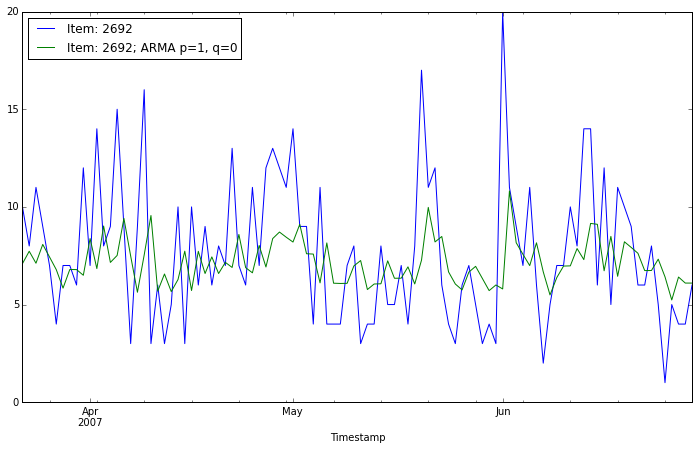

In [102]:
# ts VS forecast in first 100 steps
model_num = [0]  # [0,6], [0,4,6]
Models = sorted(FRC_TS.keys())

ts_num = 4 # 7
plot_ts = pd.DataFrame(index =ts.index)
plot_ts[ts.columns[ts_num]] = ts[ts.columns[ts_num]]
for model in model_num:
     frc_ts = FRC_TS[Models[model]]
     plot_ts[ts.columns[ts_num]+'; '+Models[model]] = frc_ts[ts.columns[ts_num]]

plot_ts.loc[800:900].plot(figsize = (12, 7)) # :250

In [105]:
# Quality 
print('MACAPE: %.2f'% qualityMACAPE(ts[ts.columns[ts_num]], frc_ts[ts.columns[ts_num]])[0])
print('RMSE: %.1f'% qualityRMSE(ts[ts.columns[ts_num]], frc_ts[ts.columns[ts_num]])[0])

MACAPE: 0.50
RMSE: 3.9


<h1 align="center"> Conclusion </h1>

** you can find HW2 here** 
  * оцените <a href="https://goo.gl/forms/SIa0Elv5PrrEnwwa2"> семинар </a>